<center><h1>Consumer Report</h1>

## Objective:
    
    Scrape the product names such as Air Conditioners, Air Filters, Air Fryers, etc, and product links from the website. And store the extracted product names and product links in our local file. We will walk through it step-by-step.

In [1]:
# import requests and beautifulsoup packages

import requests
from bs4 import BeautifulSoup

In [2]:
# request the server and get the soup (html data)

# url
url = 'https://www.consumerreports.org/cro/a-to-z-index/products/index.htm'

# request url
page = requests.get(url)
print(page)

<Response [200]>


In [3]:
# get the HTML/XML soup

soup = BeautifulSoup(page.content, 'lxml')
# print(soup)

In [4]:
# let us check how the structure of the html is to get the required information

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def images(image, a, b):
    plt.figure(figsize = (a,b))
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

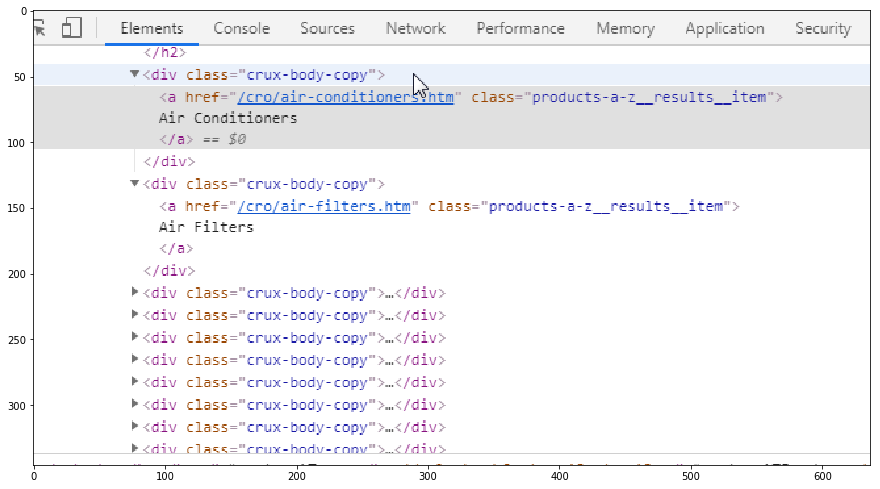

In [5]:
images('customer.png', 15,15)

### Observation:

    - We want the information like Air Conditioners, Air Filters, etc. That is names of the appliances.
    - We can see that, those names are in the 'div' with class = crux-body-copy
    - Also, we can see that names are not directly child to the div. Inside div, we have anchor (a) tag.
    - We first have to go to div then crawl to a tag and then get the string.

### Observation:
    - We can see the information is under div followed by a tag.

### Step - 1

    - Get all the div with class crux-body-copy

In [6]:
# div tags with a class 'crux-body-copy'

all_divs = [div for div in soup.find_all('div', class_='crux-body-copy')]

# all_divs

### Step - 2

    - Get all the a tags followed by href that are under div with class crux-body-copy

In [7]:
# Get all the a tags followed by href that are under div with class crux-body-copy

div_a = [div.a['href'] for div in all_divs]

# div_a

## Observation:
    - We can see all the anchor (a) tags but they are not full. We need to add base url to these extracted links to extract the full product links. Refer to the below image to get the full product links.

In [8]:
base_url = 'https://www.consumerreports.org/'

product_links = [base_url + div.a['href'] for div in all_divs]

# product_links

### Step - 3

    - Finally, we will get the string inside the div -> a -> links -> string

In [9]:
products = [div.a.string for div in all_divs]

# products

### Observation
    - We got the product names but we have '\n' at start and end of the names.
    - We will split at '\n' and join by empty space

In [10]:
product_names = [''.join(pro.split('\n')) for pro in products]

# product_names

## Final step: Saving the extracte data

In [11]:
# creating a dictionary for product names and product links
import csv
import pandas as pd

product_dict = {'product_names':product_names, 'product_links':product_links}

df = pd.DataFrame()

df['product_names'] = product_names
df['product_links'] = product_links
df.to_csv('product_names_links.csv', index = False)

df.head(20)

,product_names,product_links
0,Air Conditioners,https://www.consumerreports.org//cro/air-condi...
1,Air Filters,https://www.consumerreports.org//cro/air-filte...
2,Air Fryers,https://www.consumerreports.org//cro/air-fryer...
3,Air Mattresses,https://www.consumerreports.org//cro/air-mattr...
4,Air Purifiers,https://www.consumerreports.org//cro/air-purif...
5,Airline Travel,https://www.consumerreports.org//cro/airline-t...
6,All-purpose cleaners,https://www.consumerreports.org//cro/all-purpo...
7,Antivirus Software,https://www.consumerreports.org//cro/antivirus...
8,Appliance Stores,https://www.consumerreports.org//cro/appliance...
9,Athletic shoes,https://www.consumerreports.org//cro/athletic-...


### Refer to the Medium Blog:

 - https://medium.com/@sandeep.panchal545/part-1-basics-of-web-scraping-d7f329372fc6